In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Miniteste 3

Dados os pontos da tabela:

| x | y |
| -- | -- |
-1 | 0.03846154
-0.5 | 0.13793103
0 | 1
0.5 | 0.13793103
1 | 0.03846154

1. Utilizando **splines quadráticas** faça a interpolação da tabela acima para os pontos entre -1 e 1 com intervalo de 0.01  

Compare o gráfico obtido com a resposta exata dada pela função

$$f(x) = \frac{1}{1+25x^2}$$

2. Comente sobre os resultados obtidos.


In [0]:
#implementaçao splines

def rafael_matriz_splines(val_x,val_y):
  matriz=np.zeros((3*(val_x.shape[0]-1),3*(val_x.shape[0]-1)+1)) #numero de linhas e colunas da matriz
  num_pol=val_x.shape[0]-1 #numero de polinomios para n pontos é n-1.

  for i in range(matriz.shape[0]):
    if i<2*num_pol: #até a linha equivalente a 2 vezes o numero de polinomios, a ultima coluna recebe os valores de f(x)
      ind=i//2 #padrão para colocar os indices do vetor dos dos valores de x.
      if i%2:
        #se a linha for impar
        matriz[i,ind]=val_x[ind+1]**2
        matriz[i,ind+num_pol]=val_x[ind+1]
        matriz[i,ind+2*num_pol]=1
      else:
        #se for par
        matriz[i,ind]=val_x[ind]**2
        matriz[i,ind+num_pol]=val_x[ind]
        matriz[i,ind+2*num_pol]=1
      matriz[i,-1]=val_y[(1+i)//2] #colocando os valores de f(x)
    elif i<(matriz.shape[0]-1):
      #preenchendo as condições das derivadas
      matriz[i,i-2*num_pol]=2*val_x[i+1-2*num_pol]
      matriz[i,i+1-2*num_pol]=-2*val_x[i+1-2*num_pol]
      matriz[i,i-num_pol]=1
      matriz[i,i+1-num_pol]=-1
    else:
      #a1=0
      matriz[i,0]=1
  return matriz;


#ms = matriz spline preenchida
def solucao_sistema(ms):
  a=ms[:,:-1].copy(); #separa a matriz dos coeficientes
  b=ms[:,-1].copy(); #matriz dos valores
  return np.linalg.solve(a,b)


#ssms = solução sistema matriz splines
#val_x = valores de x da tabela
#x = ponto intermediario que deseja encontrar f(x)

def polinomio_splines(x,val_x,ssms):
  k=val_x.shape[0]-1 #k é o numero de polinomios splines
  for j in range (k):
    if x<=val_x[j+1]: #se x está dentro do intervalo
      return ssms[j]*x**2+ssms[j+k]*x+ssms[j+k*2] #retorna o valor splines de x, da forma ax^2+bx+c

def splines(x,val_x,val_y):
  k=rafael_matriz_splines(val_x,val_y)
  k1=solucao_sistema(k)
  k2=polinomio_splines(x,val_x,k1)
  #print('f(',x,') = ',k2,sep='')
  return k2;

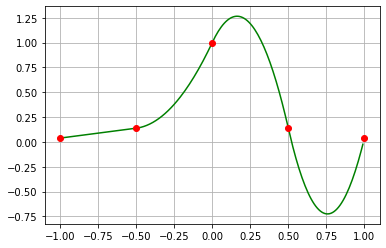

In [12]:
#1. SPLINES

x1=np.array([-1.0,-.5,0.0,.5,1.0])
y1=np.array([0.03846154,0.13793103,1.0,0.13793103,0.03846154])

x2=np.arange(-1.0,1.0,0.01,dtype=float);
y2=np.zeros(x2.shape[0],dtype=float)

for i in range(x2.shape[0]):
  y2[i]=splines(x2[i],x1,y1)

plt.plot(x2,y2,'g-',x1,y1,'ro')
plt.grid(1)
plt.show()

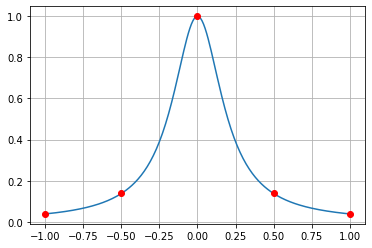

In [11]:
#Comparaçao
x_i = np.array([-1,-0.5,0,0.5,1])
y_i = 1/(1+25*x_i**2) 

x = np.arange(-1,1,0.01)
y = 1/(1+25*x**2)
plt.plot(x,y,'-',
        x_i,y_i,'ro')
plt.grid(True)

#2. Comentários
<p align="justify">No intervalo entre fx0 e fx1 o gráfico obtido pela interpolação splines aparenta ser uma reta, o que era esperado, uma vez que o coeficiente quadrático do primeiro polinômio obtido é nulo.<p>
<p align="justify">No intervalo entre fx1 e fx2 o gráfico obtido pela interpolação splines possui forma muito parecida com o gráfico original não tendo uma abertura muito ampla em relação ao eixo de simetria, diferente do que acontecia com a interpolação pelos métodos de Newton e Lagrange.<p>
<p align="justify">A partir de fx3 o gráfico obtido aparenta ser igual ao obtido pelos dois métodos anteriores, com destaque para diferenças como: Valores maiores que 1, excedendo o "máximo" e valores menores que 0 ultrapassando o "mínimo".<p>